# Least Squares Overview

## What is a least squares problem?

Given a data points $(t_j, y_j)$, fit a model $\phi(x;t_j)$ to match the data points as closely as possible.

![Least Squares Regression](https://i.imgur.com/pfWN159.png)

* Objective function $f$ has the form


$$ f(x) = \sum_{j=1}^m r_j^2(x)$$

also written as 

$$ f(x) = \sum_{j=1}^m (\overline{y}_j - y_j)^2$$

Where $r_j$ is the **residual**: the difference between the predicted $(\overline{y}_j)$ and actual value $y_j$, and $x$ is the parameters for the model.

Your goal is to fit a function $f$ to a set of points.

A common example is **least squares regression**, in which $\overline{y}_j = \phi(x;t_j) = x_1 + t_j x_2$: your model is a line, the arguments are the slope and intercept of the line.

![Error](https://i.imgur.com/m2GQldd.png)

## Linear Least Squares Problems

* Many models in data-fitting problems are linear functions of $x$. In this case, the objective function $f$ has the form

$$ f(x) = \frac{1}{2} \| Ax - b\|^2$$

$ \nabla f(x) = A^T (A x - b)$, $\nabla^2 f(x) = A^T A$.

$A$ is $m \times n$ matrix, where $m$ is the number of data points, and $n$ is the dimension of x.

$x$ is $n \times 1$, and $b$ is $m \times 1$: a list of the actual data points.

### Minimizing $f$

* Just set $\nabla f(x) = 0$: so
$$
\begin{align}
0 &= A^T A x - A^T b \\
A^T A x &= A^T b \\
x &= (A^T A)^{-1} A^T b
\end{align}
$$

The **normal equations** are
$$ A^T A x = A^T b$$

If $x^*$ is a minimizer for $f(x)$, it satisfies the normal equations.

If $b$ is in the range of $A$, then $Ax = b$, and $f(x) = 0$. If $b$ isn't in the range of $A$ (this is usually the case), then the system is **overdetermined**: it has more equations than unknowns, so it has no solution. In this case, $x^*$, the solution to the normal equation, minimizes the distance from the range to $b$.


![title](https://i.imgur.com/v2zQXnJ.png)

### 2-D case:

We're usually working in 2D, so basically: $A$ is an $m \times 2$ matrix, $x$ is a $2 \times 1$ vector representing the intercept and slope of the line, and $b$ is an $m \times 1$ vector, where $m$ is the number of data points.

#### Note on the notation:

Oftentimes with data we'll label input data as $X$ and the output as $y$. Here I think it's still customary to do that but if we're minimizing $Ax = b$ it's important to understand that $x$ here is not the data, but rather the coefficients of the line fitting to the data; the data is contained in the matrix $A$. So $t$ will represent the x-axis here, $y$ will represent the y-axis.

Example Problem:

Using the same data as in the notes:
$$ Y = 4 + 3 t + \text{Gaussian noise}$$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
t=2*np.random.rand(100,1) # unif. distributed on [0,2]
y=4+3*t+np.random.randn(100,1)
plt.plot(t, y, "b.")
plt.xlabel("time", fontsize=18)
plt.ylabel("sales", fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


<Figure size 640x480 with 1 Axes>

In the context of a least squares problem:

$b$ is just a 100 x 1 vector containing the data points $y$.

What is $Ax$? It's a 100 x 1 vector containing the predictions for each point $t_j$.

Ax = $\begin{bmatrix}
x_1 + a_{12} x_2 \\
x_1 + a_{22} x_2 \\
x_1 + a_{32} x_2 \\
\vdots
\end{bmatrix}$

**What is A?**

$
\begin{bmatrix}
1 & a_{12}\\
1 & a_{22}\\
1 & a_{32} \\
\vdots
\end{bmatrix}
$
where $a_{12},a_{22},a_{32}... = t_1,t_2,t_3...$

Using the method of least squares:

In [2]:
A = np.c_[np.ones((100, 1)), t]
 # add x0 = 1 to each instance
x_best = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
# solve normal equation
x_best

array([[4.0934674 ],
       [2.90229548]])

**How do we predict a new point?**

Say you want to predict the value at $t = 0$. Then compute
$\begin{bmatrix}
1 & 0
\end{bmatrix} x.
$



In [3]:

t_new = np.array([[0], [2]])
t_new_b = np.c_[np.ones((2, 1)), t_new] # add x0 = 1 to each instance
y_predict = t_new_b.dot(x_best)
y_predict

array([[4.0934674 ],
       [9.89805836]])

**How do we plot the linear prediction?**

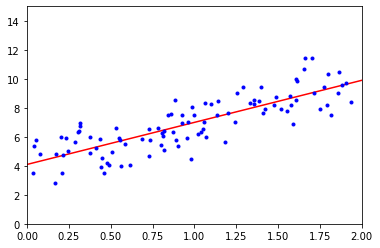

In [4]:
plt.plot(t_new, y_predict, "r-") # plot a line connecting (0, 3.8) and (2, 10.2). The "-" setting turns this into a line plot
plt.plot(t, y, "b.") # plot the data points
plt.axis([0, 2, 0, 15])
plt.show()

## Alternative: Scikit-learn LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(t, y) 
lin_reg.intercept_, lin_reg.coef_


(array([4.0934674]), array([[2.90229548]]))

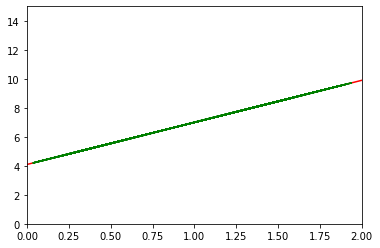

In [6]:
plt.plot(t_new, y_predict, "r-") # plot a line connecting (0, 3.8) and (2, 10.2). The "-" setting turns this into a line plot
plt.plot(t, lin_reg.intercept_ + lin_reg.coef_ * t, "g") # plot a line connecting (0, 3.8) and (2, 10.2). The "-" setting turns this into a line plot
#plt.plot(t, y, "b.") # plot the data points
plt.axis([0, 2, 0, 15])
plt.show()

#### Two ways to plot a line:

Option 1. Build an array with $[(t_0,y_0), (t_1, y_1)]$ and plot with the x-axis vector being $(t_0, t_1)$ and the y-axis vector being the array.

Option 2: Run plot with $t, x_1 + x_0 * t$.

### Gradient Descent

Find the minimizer of $f(x) = \|A x - b\|^2$ using Gradient Descent:

$\nabla f = A^T (A x - b)$


In [7]:
"""
@description: fixed step length steepest decent method
@parameters :
 @objFunc : objective function
 @gradObjFunc: gradient of objective function
 @alpha : the fixed step length, a.k.a. learning rate
 @x0 : starting point
 @tol : tolerace for stopping criteria
 @maxIter : maximum iteration for stopping criteria
"""
def fixed_step_steepest_descent_method(gradObjFunc, alpha, x0, tol,
maxIter):
  path = [x0]
  k = 0
  xk = x0
  pk = -gradObjFunc(x0)
  while np.linalg.norm(pk) > tol and k <= maxIter:
    xk = xk + alpha * pk # alpha is fixed: alpha = 0.01
    pk = -gradObjFunc(xk)
    k = k + 1
    path.append(xk)

  path = np.array(path) # convert to array

  if np.linalg.norm(pk) <= tol:
     print("Found the minimizer at {x} with {iter} iterations successfully, \
gradient's norm is {nrm}.".format(x=xk,iter=k,nrm=np.linalg.norm(pk)))
  else:
     print("Unable to locate minimizer within maximum iterations, last \
position is at {x}, gradient's norm is {nrm}".format(x=xk,nrm=np.linalg.norm(pk)))

  return xk, k, path

f = lambda theta: np.linalg.norm(A @ theta - y)**2
Df = lambda theta: A.T.dot(A.dot(theta) - y)
D2f = lambda theta: A.T.dot(A)
x0 = np.random.randn(2,1)
coeffs, k, path = fixed_step_steepest_descent_method(Df, 0.002, x0, 1e-7, 10000)

Found the minimizer at [[4.0934674 ]
 [2.90229549]] with 607 iterations successfully, gradient's norm is 9.878272629724366e-08.


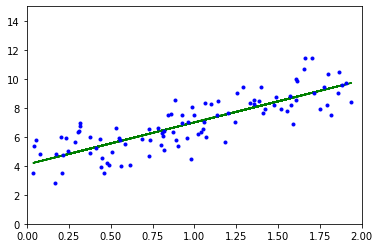

In [8]:
#plt.plot(t_new, y_predict, "r-") # plot a line connecting (0, 3.8) and (2, 10.2). The "-" setting turns this into a line plot
plt.plot(t, coeffs[0]+ coeffs[1] * t, "g") # plot a line connecting (0, 3.8) and (2, 10.2). The "-" setting turns this into a line plot
plt.plot(t, y, "b.") # plot the data points
plt.axis([0, 2, 0, 15])
plt.show()

Newton's Method

In [9]:
x = np.random.randn(2,1)  # initial point
path = [x]
print(f'Initial x={x}')
alpha = 1             # step size is 1 in Newton's method
tol = 1e-8            # stop when gradient is smaller than this amount
max_steps = 1000      # Maximum number of steps to run the iteration
i=0                   # iteration count
dx = Df(x)            # current gradient
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = np.linalg.solve(D2f(x),dx)  # faster to solve a system than manually invert: 
    xnew = x - pk
    path.append(xnew)
    x = xnew
    dx = Df(x)
    i += 1

path=np.array(path)
print(f'After {i} iterations, approximate minimum is {f(x)} at {x}')

Initial x=[[0.8484677 ]
 [1.64511937]]
After 1 iterations, approximate minimum is 115.4441148313218 at [[4.0934674 ]
 [2.90229548]]


## 3D Least Squares

We probably wouldn't have to work with 3D, but this is just to illustrate how things work in higher dimensions:

In 3D, the linear prediction is a line in 3D space:

$\overline{y} = x_1 + t_1 x_2 + t_2 x_3$

## Summary and Important Facts about Least Squares and Gradient Descent

A linear least squares problem is of the form

$$ f(x) = \frac{1}{2} \|Ax - b\|^2$$

(the 1/2 is not important)

* Minimizing $f(x)$ amounts to solving $x^* = (A^T A)^{-1} A^T b$. This requires **matrix inversion**, which is a very costly procedure if the dimension of x, $n$, is large  (it takes $O(N^3)$ flops to perform matrix inverses, or $O(N^2)$ if you're using scikit-learn ).

* Method is linear in $m$, the number of data points, so it can handle very large datasets easily.

* Inference is instant once parameters are learned; you simply need to compute $Ax$ for an input matrix $A$.

### Gradient Descent

You can use gradient descent to fit a (linear) model to the data.

**Pros**:

* Doesn't require matrix inversion!

**Cons**:

* The step size majorly impacts the speed of convergence, so a correct step size must be found.

* Handles poorly for very large data sizes.

Consider $A$ an $m \times n$ array: If you perform gradient descent, the steps can take a very long time if you're calculating the gradient on the entire array.

In [24]:
import time
m = 100000
n = 1000
A2 = np.random.rand(m, n)
b = np.random.rand(m, 1)
theta = np.random.rand(n, 1)

0.07700419425964355


In [25]:
start = time.time()
A2.T.dot(A2.dot(theta) - b)
end = time.time() - start
print(end)

0.07098841667175293
